In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [2]:
#h5_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\mdHM_12-04_13-41_Centralized\Centralized_test.h5"
h5_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\mdHM_12-05_11-24_Centralized\Centralized_test.h5"

with h5py.File(h5_results_path, 'r') as f:
    a_group_key = list(f.keys())
    print(a_group_key)
    train_loss = f['rs_train_loss'][()]
    test_loss = f['rs_test_loss'][()]
    gradient_norms = f['gradient_norm_lists_by_client']#[()]
    print(gradient_norms)
    print(gradient_norms.keys())
    cent_client_grad_norms = gradient_norms['METACPHS_S106_C3']
    print(type(cent_client_grad_norms))
    print(cent_client_grad_norms)
    #plt.plot(cent_client_grad_norms)


['client_testing_logs', 'cost_func_tuples_by_client', 'gradient_norm_lists_by_client', 'rs_test_loss', 'rs_train_loss']
<HDF5 group "/gradient_norm_lists_by_client" (1 members)>
<KeysViewHDF5 ['METACPHS_S106_C3']>
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "METACPHS_S106_C3": shape (42,), type "<f8">


In [5]:
train_loss

array([], dtype=float64)

In [6]:
test_loss

array([0.42528173])

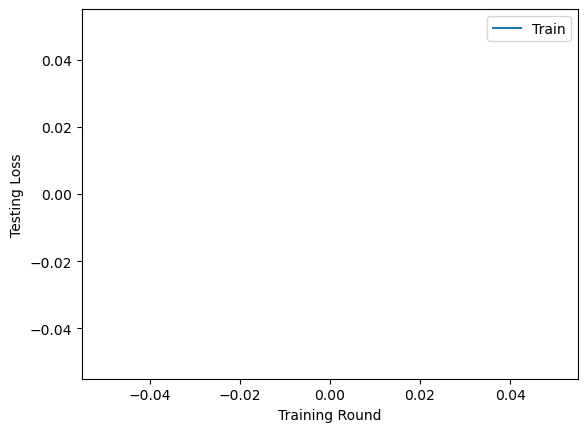

In [3]:
plt.plot(range(len(train_loss)), train_loss, label="Train")
#plt.plot(range(len(local_val_test_loss)), local_val_test_loss, label="Local")
#plt.title("Averaged Test Loss: Vanilla Main Run")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

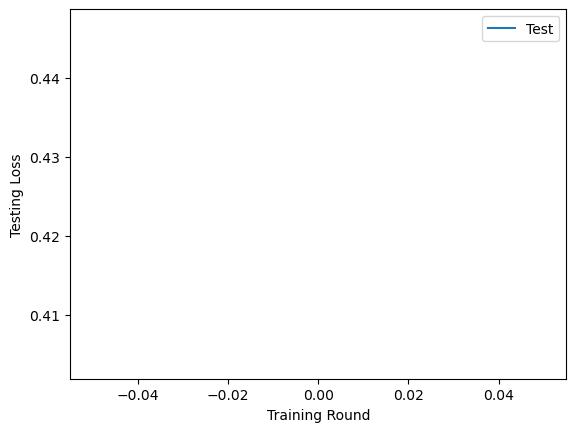

In [4]:
plt.plot(range(len(test_loss)), test_loss, label="Test")
#plt.plot(range(len(local_val_test_loss)), local_val_test_loss, label="Local")
#plt.title("Averaged Test Loss: Vanilla Main Run")
plt.xlabel("Training Round")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()